## Imports and Data

I have included the minimal sufficient imports to complete the coursework. You are welcome to import other modules.

Don't worry massively about code throwing warnings for this work.

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.RandomState(4)
X = rng.uniform(0, 5, 20).reshape(-1, 1)
y = np.sin((X[:, 0] - 2.5) ** 2) + 0.5*np.sin(3*X[:,0])+np.random.normal(0,0.01,size=X.shape[0])
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=rng)
del X,y

## 1) Gaussian Process Regression
### a) Plot the train data points with blue markers and the test data points as red markers over an x range from 0 to 10

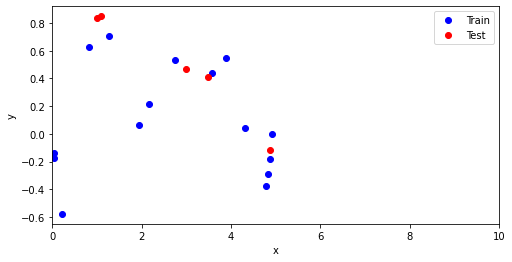

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(X_train, y_train, 'bo', label='Train')
ax.plot(X_test, y_test, 'ro', label='Test')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(0, 10)
plt.legend()
plt.show()

### b) Compare the prior distribution of functions of a Gaussian Process Regressor with an WhiteKernel, DotProduct cubed!, RationalQuadratic, and RBF Kernel and overlay the train and/or test data

You will need to:
- make an instance of gaussianprocessregressor
- use its sample_y function for a range of x values from 0 to 5 for n_samples 3-5. Each column of the output can be considered a sample function.
- make some observations
- for rq and rbf kernel use parameters: length_scale=1.0, length_scale_bounds=(1e-1, 10.0)
- for DotProduct use DotProduct()**3

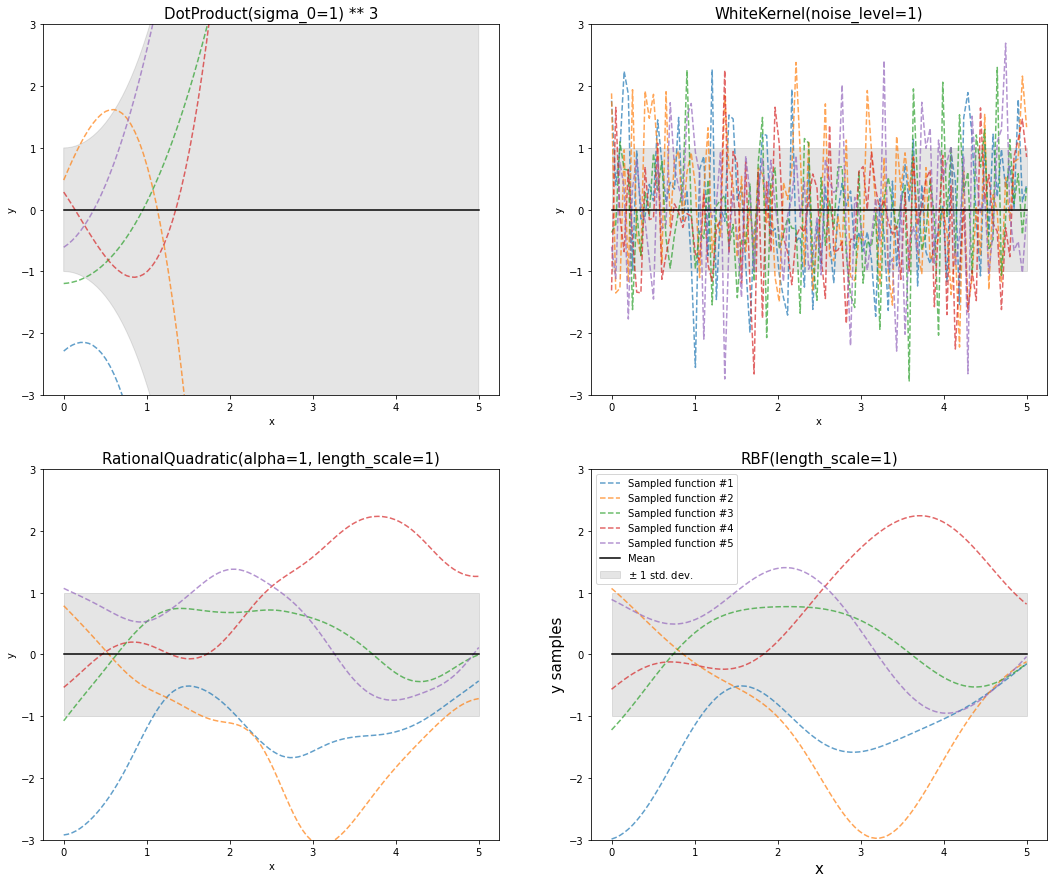

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RationalQuadratic, RBF

def plot_gaussian_process(gpr_model, n_samples, ax):

    x = np.linspace(0, 5, 100)
    X = x.reshape(-1, 1)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples)

    for idx, single_prior in enumerate(y_samples.T):
        ax.plot(
            x,
            single_prior,
            linestyle="--",
            alpha=0.7,
            label=f"Sampled function #{idx + 1}",
        )
    ax.plot(x, y_mean, color="black", label="Mean")
    ax.fill_between(
        x,
        y_mean - y_std,
        y_mean + y_std,
        alpha=0.1,
        color="black",
        label=r"$\pm$ 1 std. dev.",
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_ylim([-3, 3])


kernels = [DotProduct()**3, WhiteKernel(), RationalQuadratic(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)), RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))]
fig, axes = plt.subplots(2, 2, figsize=(18,15)) 

for kernel, ax in zip(kernels, axes.flatten()):
    gpr = GaussianProcessRegressor(kernel=kernel)
    plot_gaussian_process(gpr, n_samples=5, ax=ax)
    ax.set_title(str(gpr.kernel), fontsize=15)  

plt.xlabel('x', fontsize=15)
plt.ylabel('y samples', fontsize=15)
plt.legend(fontsize=15, prop={"size":10})
plt.show()

### c) Repeat b) but after fitting to the y_train data and comment!

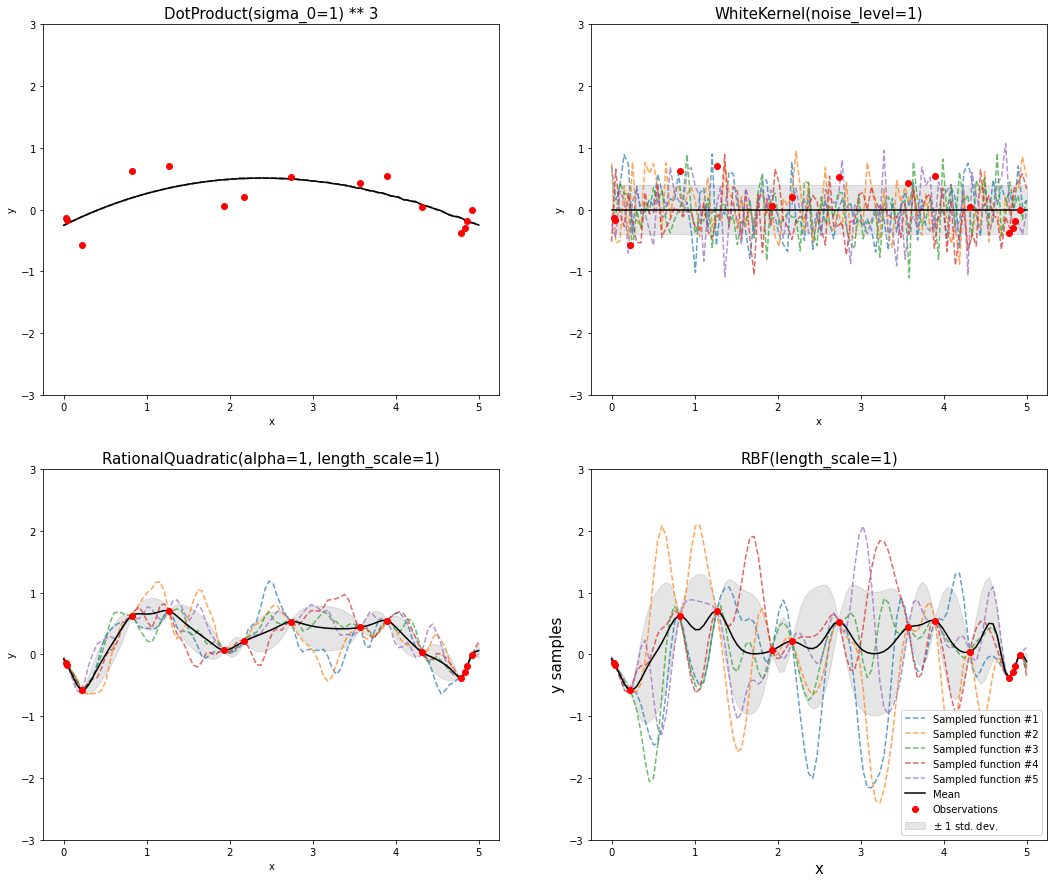

In [ ]:
kernels = [DotProduct()**3, WhiteKernel(), RationalQuadratic(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)), RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))]

x = np.linspace(0, 5, 100).reshape(-1, 1)

fig, axes = plt.subplots(2, 2, figsize=(18,15))  

for kernel, ax in zip(kernels, axes.flatten()):
    gpr = GaussianProcessRegressor(kernel=kernel).fit(X_train, y_train)
    ax.scatter(X_train[:, 0], y_train, color="red", zorder=10, label="Observations")
    plot_gaussian_process(gpr, n_samples=5, ax=ax)
    ax.set_title(str(gpr.kernel), fontsize=15)  

plt.xlabel('x', fontsize=15)
plt.ylabel('y samples', fontsize=15)
plt.legend(fontsize=15, prop={"size":10})
plt.show()

#### Before fitting the data (prior):


*   Dot Product Cubed: we can see in the plot that the GP model using this kernel produced cubic polynomial functions and the mean is equal to zero.
*   White Kernel: this kernel adds noise to model, as result the sampled functions are noisy as seen in the plot and the mean is equal to zero.

*   Rational Quadratic: This kernel produced non-linear smooth functions with more flexibility.
*   RBF: this kernel produced simialar functions to the rational quadratic but the functions are less flexible.

#### After fitting the data (posterior):


*   Dot Product Cubed: the plot shows how the kernel produced low uncertainty functions that are smooth and just on top of the mean, with no standard deviation. but it could not match most of the observations (datapoints) for the lack of flexibilty, although it is good to avoid overfitting. Its quite simialr to linear regression.
*    White Kernel: the sampled functions were noisy but still tried to match the observations, this is expected since this kernel is used to add noise to the model to avoid overfitting. 
*   Rational Quadratic: the functions were near the mean and it seems the model is fitted to the data very well, due the flexibilty of the kernel. but also its seems be prone to overfitting. Since the standard deviaton is low, that makes the kernel not the best in generlisation. 
*   RBF: this kernel performed simialr to  Rational Quadratic but with a higher standard deviation, which might indicate it can help the GP model generlise better on unseen data. 






### d) For the rbf kernel, repeat c for different sized subsamples of the training data and comment!

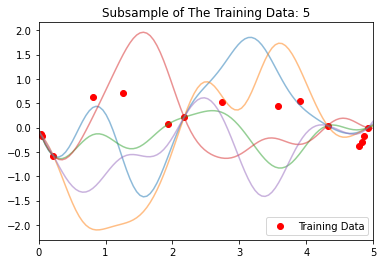

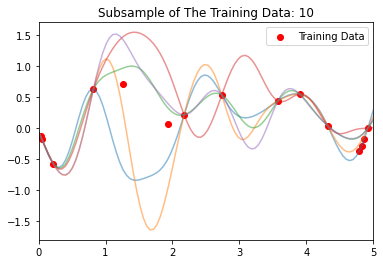

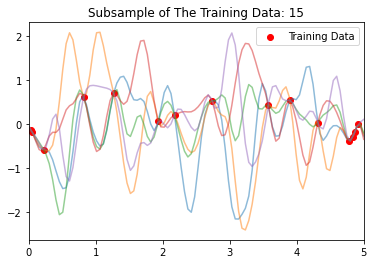

In [ ]:
gpr_rbf = GaussianProcessRegressor(kernel=RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)))

x = np.linspace(0, 5, 100)
for i in range(5, 16, 5):
  
    gpr_rbf.fit(X_train[:i], y_train[:i])

    y_rbf = gpr_rbf.sample_y(x.reshape(-1, 1), n_samples=5)

    fig, ax = plt.subplots()
    for j in range(5):
        ax.plot(x, y_rbf[:, j], alpha=0.5)
 
    ax.scatter(X_train, y_train, c="red", marker="o", label="Training Data")
    ax.set_xlim(0, 5)
    ax.set_title("Subsample of The Training Data: {}".format(i))
    plt.legend()
    plt.show()

###  The plots illustrate the effect of the sample size, the smaller the sample size the higher is the uncertainty in the GP model. but once the training sample size increased the GP modeld with RBF kernel had lower uncertainty, and the sampled functions manged to fit the data better. 

## 2) Regularisation
### a) For alpha between 10^-3 and 10^-1 demonstrate the effect of the regularisation parameter alpha and comment

In [ ]:
def gpr_RBF(alpha):
  x = np.linspace(0, 5, 100)

  rbf_kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))

  gpr_rbf = GaussianProcessRegressor(kernel=rbf_kernel, alpha= alpha)

  gpr_rbf.fit(X_train, y_train)

  y_rbf = gpr_rbf.sample_y(x.reshape(-1, 1), n_samples=5)
  fig, ax = plt.subplots()
    

  for i in range(5):
    ax.plot(x, y_rbf[:, i], alpha=0.5)

  ax.scatter(X_train, y_train, c="red", marker="o", label="Training Data")
  ax.set_xlim(0, 5)
  plt.legend()
  plt.show()

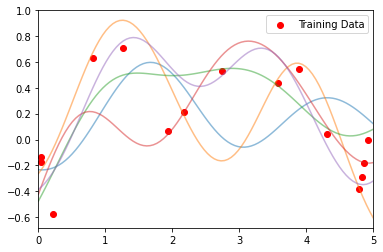

In [ ]:
gpr_RBF(0.1)

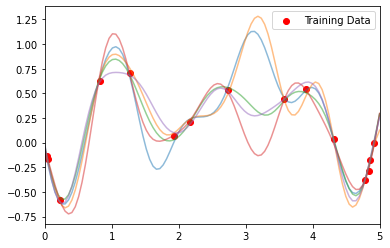

In [ ]:
gpr_RBF(0.001)

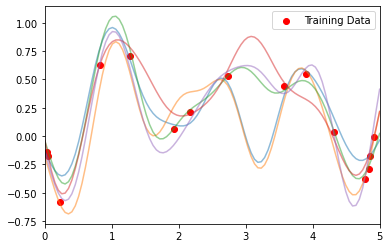

In [ ]:
gpr_RBF(0.01)

In [ ]:
from sklearn.metrics import mean_squared_error

for alpha in [10**-3, 10**-2, 10**-1]:
    gpr = GaussianProcessRegressor(kernel=RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)), alpha=alpha)
    gpr.fit(X_train, y_train)
    y_pred = gpr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Alpha: {} - MSE: {}".format(alpha, mse))

Alpha: 0.001 - MSE: 0.0020797104923810494
Alpha: 0.01 - MSE: 0.00084432353309442
Alpha: 0.1 - MSE: 0.055707203439680775


### the effects of the alpha is simialr to the sample size of the training data. The lower the value of alpha the more confident the model is with its function predictions, which results in lower standard deviation. Although decreasing the alpha value a lot might make the model overfit, as seen in the result of the MSE in the testing data.